In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../src')

from mtb_data_set import MtbDataSet

In [29]:
mtb_data_set = MtbDataSet()
mtb_data_set.create_data_set(['arosahoernli_m_1', 'davospanorama_m_3'], 'delete_me_dataset.csv')

Creating dataset delete_me_dataset.csv
Converting Garmin .fit file ../data/arosahoernli_m_1.fit
fetching from:  https://overpass-api.de/api/map?bbox=9.620783245190978,46.76471290178597,9.65990100055933,46.772989025339484
fetching from:  https://www.trailforks.com/api/1/trails?scope=track&filter=bbox::46.772989025339484,9.620783245190978,46.76471290178597,9.65990100055933&app_secret=374340a0656feca4&app_id=45
Mapping Meta Data from Web APIs...



No Gopro File found for:  ../data/arosahoernli_m_1
Converting Garmin .fit file ../data/davospanorama_m_3.fit
fetching from:  https://overpass-api.de/api/map?bbox=9.795786403119564,46.78936751559377,9.86876092851162,46.861525643616915
fetching from:  https://www.trailforks.com/api/1/trails?scope=track&filter=bbox::46.861525643616915,9.795786403119564,46.78936751559377,9.86876092851162&app_secret=374340a0656feca4&app_id=45
Mapping Meta Data from Web APIs...



No Gopro File found for:  ../data/davospanorama_m_3
Dataset successfully created: data/delete_me_dataset.csv


In [41]:
import pandas as pd

mtb_df = pd.read_csv("../data/mtb_dataset_20200924.csv")

In [42]:
mtb_df.head()

,input_filename,rider_id,trail_name,timestamp,distance,SensorSpeed,heart_rate,altitude,SensorHeading,SensorAccelerationX_HD,...,trailforks_season,trailforks_condition,trailforks_difficulty_votes,trailforks_difficulty_user_avg,trailforks_family_friendly,trailforks_amtb-rating,trailforks_activitytypes,gopro_video_path,gopro_image_path,video_position
0,arosahoernli_w_4,4,arosahoernli,9.684186e+11,0.49,1.007715,93.0,0.0,0.620081,712.0,...,NaN,5,2,5,0,0,"[1, 6, 5]",0.0,0.0,0.0
1,arosahoernli_w_4,4,arosahoernli,9.684186e+11,0.49,1.007715,93.0,0.0,0.620081,736.0,...,NaN,5,2,5,0,0,"[1, 6, 5]",0.0,0.0,0.0
2,arosahoernli_w_4,4,arosahoernli,9.684186e+11,0.49,1.007715,93.0,0.0,0.620081,868.0,...,NaN,5,2,5,0,0,"[1, 6, 5]",0.0,0.0,0.0
3,arosahoernli_w_4,4,arosahoernli,9.684186e+11,0.49,1.007715,93.0,0.0,0.620081,1060.0,...,NaN,5,2,5,0,0,"[1, 6, 5]",0.0,0.0,0.0
4,arosahoernli_w_4,4,arosahoernli,9.684186e+11,0.49,1.007715,93.0,0.0,0.620081,1272.0,...,NaN,5,2,5,0,0,"[1, 6, 5]",0.0,0.0,0.0


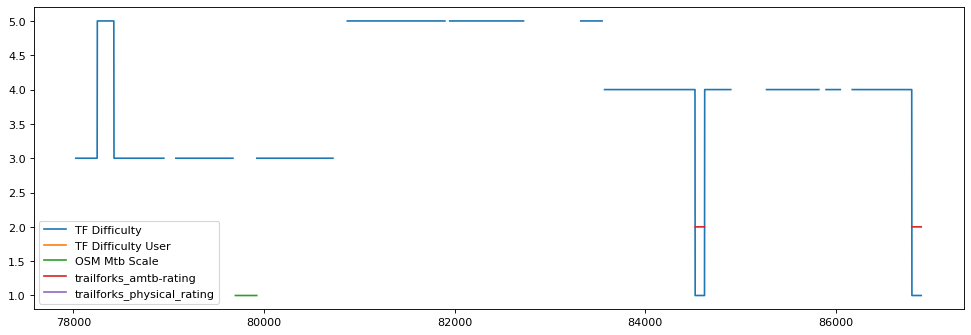

In [73]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np

figure(num=None, figsize=(15, 5), dpi=80, facecolor='w', edgecolor='k')

filter = mtb_df["input_filename"]=="dandlberg_m_1" #dandlberg_m_1 davospanorama_m_3
hoernli = mtb_df.where(filter) 
hoernli.replace(0, np.nan, inplace=True)

plt.plot(hoernli['trailforks_difficulty'])
plt.plot(hoernli['trailforks_difficulty_user_avg'])
plt.plot(hoernli['osm_mtb:scale'])
plt.plot(hoernli['trailforks_physical_rating'])
plt.plot(hoernli['trailforks_amtb-rating'])
plt.legend(['TF Difficulty', 'TF Difficulty User', 'OSM Mtb Scale', 'trailforks_amtb-rating', 'trailforks_physical_rating'])